In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imutils
import tensorflow as tf
from tensorflow import keras
from typing import Optional, List
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from DataClasses import Exercise, FrameData, VideoData, Dataset, build_tf_dataset
from Models import ClassifierModel, normalize_label
from pose_detection import extract_pose_from_video_interpolated

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [3]:
num_classes = 22

clf = ClassifierModel(n_classes=num_classes)
model = clf.build_model()
model.summary()

Model: "pointnet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 33, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 33, 32)    │        128 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 33, 32)    │        128 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 33, 32)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 33, 64)    │      2,112 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 64)    │        256 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 33, 64)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 33, 512)   │     33,280 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 512)   │      2,048 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 33, 512)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ activation_2[0][… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    131,328 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 128)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 9)         │      1,161 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 3, 3)      │          0 │ dense_2[0][0]   

 Total params: 750,527 (2.86 MB)

 Trainable params: 744,447 (2.84 MB)

 Non-trainable params: 6,080 (23.75 KB)

Model: "pointnet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 33, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 33, 32)    │        128 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 33, 32)    │        128 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 33, 32)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 33, 64)    │      2,112 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 64)    │        256 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 33, 64)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 33, 512)   │     33,280 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 512)   │      2,048 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 33, 512)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ activation_2[0][… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    131,328 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 128)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 9)         │      1,161 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 3, 3)      │          0 │ dense_2[0][0]   

 Total params: 750,527 (2.86 MB)

 Trainable params: 744,447 (2.84 MB)

 Non-trainable params: 6,080 (23.75 KB)

In [4]:
# Conversion en dataset de frames
dataset = Dataset()

dataset_raw = pd.read_csv("data/full_landmarks_dataset.csv")  # Pour charger le dataset complet


# Ajout d'une barre de chargement avec tqdm
for index, data in tqdm(dataset_raw.iterrows(), total=len(dataset_raw), desc="Chargement du dataset"):
    frame_data = FrameData(
        filename=data["video_name"], 
        frame_index=data["frame_number"],
        landmarks=np.array(data.drop(["video_name","total_frames","frame_number","width","height","label"])).reshape(-1, 3),
        predicted_class=None,
        confidence=None,
        scores=None,
        ground_truth=Exercise(normalize_label(data["label"]))
    )
    dataset.add_data(frame_data)

print(f"Dataset chargé avec succès ! Total: {len(dataset.datas)} frames")

Chargement du dataset: 100%|██████████| 103890/103890 [00:38<00:00, 2708.55it/s]

Dataset chargé avec succès ! Total: 103890 frames


📊 Division du dataset...
Split completed:
  Training: 82665 frames from 361 videos
  Testing: 21225 frames from 91 videos
Classes d'entraînement uniques: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Classes de test uniques: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
🔧 Construction des datasets TensorFlow...
Forme des batches d'entraînement: X=(128, 33, 3), y=(128, 22)
🎯 Début de l'entraînement du modèle...
🚀 Début de l'entraînement...
Epoch 1/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 134s 187ms/step - accuracy: 0.8611 - loss: 0.5702 - val_accuracy: 0.4740 - val_loss: 2.5485 - learning_rate: 0.0010
Epoch 2/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 127s 196ms/step - accuracy: 0.9722 - loss: 0.1239 - val_accuracy: 0.5026 - val_loss: 2.8237 - learning_rate: 0.0010
Epoch 3/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 125s 194ms/step - accuracy: 0.9809 - loss: 0.0889 - val_accuracy: 0.4090 - val_loss: 4.0123 - learning_rate: 0.0010
Epoch 4/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 132s 204

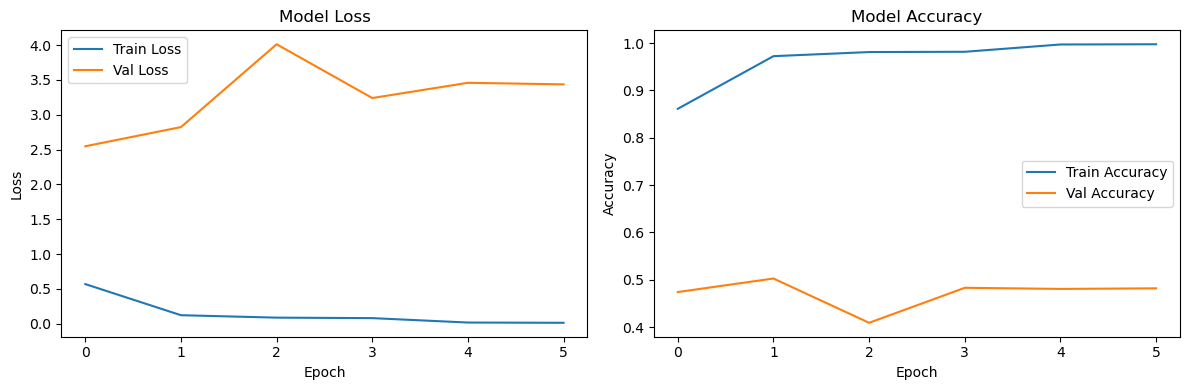

In [5]:
# Split train / test
print("📊 Division du dataset...")
train_dataset, test_dataset = dataset.split(train_ratio=0.8)

# Vérification des classes dans chaque split
train_X, train_y = train_dataset.get_data_arrays()
test_X, test_y = test_dataset.get_data_arrays()

print(f"Classes d'entraînement uniques: {np.unique(train_y)}")
print(f"Classes de test uniques: {np.unique(test_y)}")

# === 3️⃣ Construction des datasets TensorFlow ===
print("🔧 Construction des datasets TensorFlow...")
train_tf_dataset = build_tf_dataset(train_dataset, num_classes=num_classes, batch_size=128)
test_tf_dataset = build_tf_dataset(test_dataset, num_classes=num_classes, batch_size=128)

# Vérification des formes
for batch in train_tf_dataset.take(1):
    X_batch, y_batch = batch
    print(f"Forme des batches d'entraînement: X={X_batch.shape}, y={y_batch.shape}")

# === 4️⃣ Entraînement ===
print("🎯 Début de l'entraînement du modèle...")
history = clf.train_model(train_tf_dataset, test_tf_dataset, epochs=10, lr=0.001)

# Affichage des courbes d'entraînement
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

    class_index class_name  train_count  test_count  train_pct  test_pct
0             0    Class 0         3997        1097       4.84      5.17
1             1    Class 1         2243         556       2.71      2.62
2             2    Class 2         4104         323       4.96      1.52
3             3    Class 3         2818        1802       3.41      8.49
4             4    Class 4         2762           0       3.34      0.00
5             5    Class 5         2625         896       3.18      4.22
6             6    Class 6         3151        1961       3.81      9.24
7             7    Class 7          918         137       1.11      0.65
8             8    Class 8         2800         438       3.39      2.06
9             9    Class 9         4696        1818       5.68      8.57
10           10   Class 10         3674        1152       4.44      5.43
11           11   Class 11         3141         634       3.80      2.99
12           12   Class 12         8589        1298

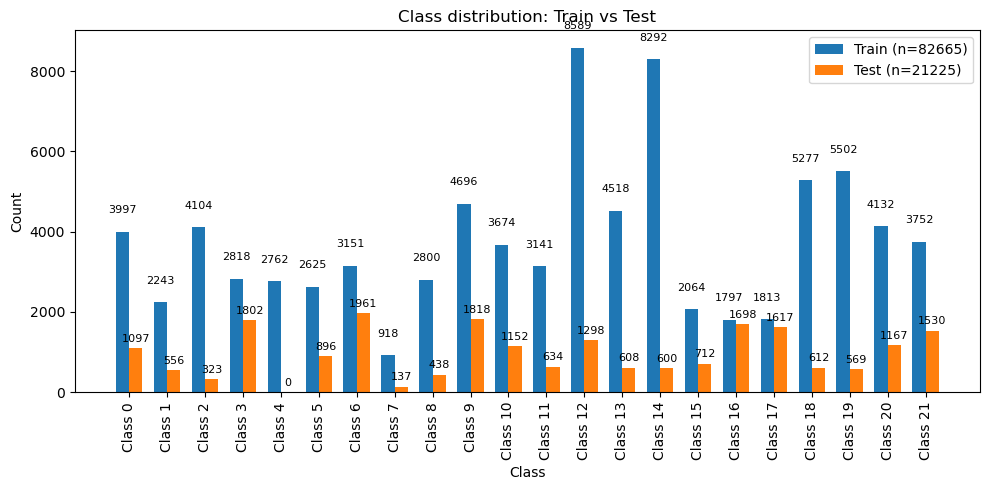

In [ ]:
# Fonction faite par IA qui permet d'observer la composition du dataset

import pandas as pd

def plot_class_distribution(train_dataset=None, test_dataset=None, train_y=None, test_y=None, num_classes=None, class_names=None):
    """
    Show repartition of ground-truth classes between training and test sets.
    Accepts either Dataset objects (with get_data_arrays) or raw label arrays.
    If labels are one-hot, they will be converted with argmax.
    """
    def _to_label_array(y):
        if y is None:
            return None
        arr = np.array(y)
        # one-hot -> argmax
        if arr.ndim == 2:
            return arr.argmax(axis=1)
        # try to convert enums/objects to ints
        def _elem_to_int(v):
            if hasattr(v, "value"):
                return int(v.value)
            try:
                return int(v)
            except Exception:
                return v
        converted = np.array([_elem_to_int(v) for v in arr])
        return converted.astype(int)

    # extract from Dataset objects if provided
    if train_dataset is not None:
        _, train_y = train_dataset.get_data_arrays()
    if test_dataset is not None:
        _, test_y = test_dataset.get_data_arrays()

    train_y = _to_label_array(train_y)
    test_y  = _to_label_array(test_y)

    if train_y is None and test_y is None:
        raise ValueError("Provide at least train_dataset/train_y or test_dataset/test_y")

    # determine number of classes
    max_label = -1
    for arr in (train_y, test_y):
        if arr is not None and len(arr) > 0:
            max_label = max(max_label, int(np.max(arr)))
    if num_classes is None:
        if max_label >= 0:
            num_classes = max_label + 1
        elif 'num_classes' in globals():
            num_classes = globals()['num_classes']
        elif 'clf' in globals() and hasattr(globals()['clf'], 'n_classes'):
            num_classes = globals()['clf'].n_classes
        else:
            raise ValueError("Cannot infer num_classes; pass num_classes argument")

    train_counts = np.zeros(num_classes, dtype=int)
    test_counts  = np.zeros(num_classes, dtype=int)
    if train_y is not None:
        vals, cnts = np.unique(train_y, return_counts=True)
        for v, c in zip(vals, cnts):
            if 0 <= int(v) < num_classes:
                train_counts[int(v)] = c
    if test_y is not None:
        vals, cnts = np.unique(test_y, return_counts=True)
        for v, c in zip(vals, cnts):
            if 0 <= int(v) < num_classes:
                test_counts[int(v)] = c

    total_train = train_counts.sum()
    total_test  = test_counts.sum()
    train_pct = (train_counts / total_train * 100) if total_train > 0 else np.zeros_like(train_counts, dtype=float)
    test_pct  = (test_counts  / total_test  * 100) if total_test  > 0 else np.zeros_like(test_counts, dtype=float)

    # class labels
    if class_names is None:
        class_names = [f"Class {i}" for i in range(num_classes)]
    else:
        if len(class_names) < num_classes:
            # pad
            class_names = list(class_names) + [f"Class {i}" for i in range(len(class_names), num_classes)]

    # build summary table and print
    df = pd.DataFrame({
        "class_index": range(num_classes),
        "class_name": class_names[:num_classes],
        "train_count": train_counts,
        "test_count": test_counts,
        "train_pct": np.round(train_pct, 2),
        "test_pct": np.round(test_pct, 2)
    })
    print(df)

    # plot side-by-side bar chart (counts)
    x = np.arange(num_classes)
    width = 0.35
    plt.figure(figsize=(max(10, num_classes * 0.4), 5))
    plt.bar(x - width/2, train_counts, width, label=f"Train (n={total_train})")
    plt.bar(x + width/2, test_counts, width, label=f"Test (n={total_test})")
    plt.xticks(x, class_names[:num_classes], rotation=90)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.title("Class distribution: Train vs Test")
    plt.legend()
    # annotate counts
    for i in x:
        plt.text(i - width/2, train_counts[i] + max(1, total_train * 0.005), str(train_counts[i]), ha='center', va='bottom', fontsize=8)
        plt.text(i + width/2, test_counts[i]  + max(1, total_test  * 0.005),  str(test_counts[i]),  ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()

# Example usage in this notebook:
plot_class_distribution(train_dataset=train_dataset, test_dataset=test_dataset)

In [6]:
# Exemple avec 2 vidéos pour tester
video1 = VideoData(filename="data/test_bench_press.mp4", ground_truth=Exercise.BENCH_PRESS)
video1.landmark_estimation()
video1.normalize()

dataset = Dataset()
dataset.add_video_data(video1)


🔍 Processing video frames...


Reading frames: 100%|███████████████████████████| 53/53 [00:07<00:00,  6.74it/s]


✅ Interpolation done.
💾 Landmarks saved to interpolated_landmarks.txt


In [7]:
for frame_data in dataset.datas:
    clf.predict_frame(frame_data)
    print(f"Vidéo: {frame_data.filename}, Frame: {frame_data.frame_index}, Prédit: {frame_data.predicted_class}, Vérité: {frame_data.ground_truth}")

Vidéo: data/test_bench_press.mp4, Frame: 0, Prédit: Exercise.DECLINE_BENCH_PRESS, Vérité: Exercise.BENCH_PRESS
Vidéo: data/test_bench_press.mp4, Frame: 1, Prédit: Exercise.DECLINE_BENCH_PRESS, Vérité: Exercise.BENCH_PRESS
Vidéo: data/test_bench_press.mp4, Frame: 2, Prédit: Exercise.DECLINE_BENCH_PRESS, Vérité: Exercise.BENCH_PRESS
Vidéo: data/test_bench_press.mp4, Frame: 3, Prédit: Exercise.DECLINE_BENCH_PRESS, Vérité: Exercise.BENCH_PRESS
Vidéo: data/test_bench_press.mp4, Frame: 4, Prédit: Exercise.DECLINE_BENCH_PRESS, Vérité: Exercise.BENCH_PRESS
Vidéo: data/test_bench_press.mp4, Frame: 5, Prédit: Exercise.DECLINE_BENCH_PRESS, Vérité: Exercise.BENCH_PRESS
Vidéo: data/test_bench_press.mp4, Frame: 6, Prédit: Exercise.DECLINE_BENCH_PRESS, Vérité: Exercise.BENCH_PRESS
Vidéo: data/test_bench_press.mp4, Frame: 7, Prédit: Exercise.DECLINE_BENCH_PRESS, Vérité: Exercise.BENCH_PRESS
Vidéo: data/test_bench_press.mp4, Frame: 8, Prédit: Exercise.DECLINE_BENCH_PRESS, Vérité: Exercise.BENCH_PRESS
V